In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import scipy.stats

In [6]:
matplotlib.style.use('seaborn-v0_8-whitegrid')

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Load palmerpenguins dataset

Source:
https://github.com/allisonhorst/palmerpenguins

In [7]:
penguins_original = pd.read_csv(
    'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
    )

# Remove null values

In [8]:
nan_indexes = penguins_original.index[penguins_original.isna().any(axis=1)]
penguins = penguins_original.dropna(axis = 0, how = 'any').copy()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# species-sex tuple

In [12]:
penguins.loc[:,'species_sex_tuple'] = penguins.apply(lambda row: f"{row.species},{row.sex}", axis = 1)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_sex_tuple
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,"Adelie,male"
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,"Adelie,female"
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,"Adelie,female"
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,"Adelie,female"
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,"Adelie,male"
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,"Chinstrap,male"
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,"Chinstrap,female"
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,"Chinstrap,male"
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,"Chinstrap,male"


# Linear Regression

## bill_depth_mm vs bill_length_mm

### No discrimination

In [35]:
# penguins.loc [:, 'bill_length_mm'].corr(penguins.loc [:, 'bill_depth_mm'])
penguins.loc[:,['bill_length_mm', 'bill_depth_mm']].corr()

,bill_length_mm,bill_depth_mm
bill_length_mm,1.000000,-0.228626
bill_depth_mm,-0.228626,1.000000


A poor linear correlation. A linear regression is not useful.

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


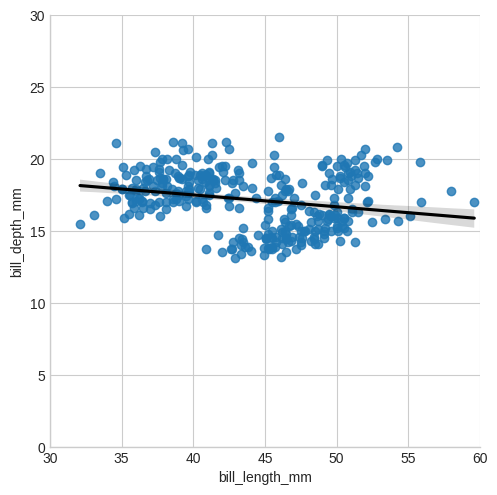

In [127]:
g = sns.lmplot(
    data = penguins,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    line_kws = {'color': 'black'},
)
g.set(xlim = (30, 60), ylim = (0, 30))

lin_reg = scipy.stats.linregress(
    x = penguins.bill_length_mm, 
    y = penguins.bill_depth_mm
)
print( lin_reg )

LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


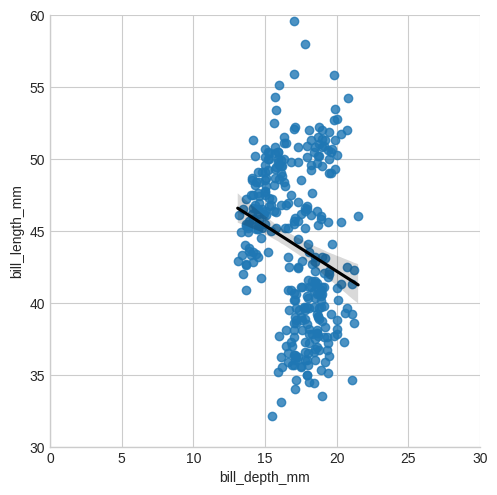

In [126]:
g = sns.lmplot(
    data = penguins,
    y = 'bill_length_mm',
    x = 'bill_depth_mm',
    line_kws = {'color': 'black'},
)
g.set(ylim = (30, 60), xlim = (0, 30))

lin_reg = scipy.stats.linregress(
    y = penguins.bill_length_mm, 
    x = penguins.bill_depth_mm
)
print( lin_reg )

### Discriminating by species

In [95]:
penguins.loc[penguins.species == 'Adelie'].loc[:,['bill_length_mm', 'bill_depth_mm']].corr()

,bill_length_mm,bill_depth_mm
bill_length_mm,1.000000,0.385813
bill_depth_mm,0.385813,1.000000


In [135]:
print("Pearson's r correlation coefficient for bill_depth_mm vs bill_length_mm")
for s, sp in penguins.groupby('species'):
    print(s)
    print(sp
          .loc [:, 'bill_length_mm']
          .corr(penguins.loc [:, 'bill_depth_mm']))
    print()


Pearson's r correlation coefficient for bill_depth_mm vs bill_length_mm
Adelie
0.3858132004955791

Chinstrap
0.6535362081800429

Gentoo
0.6540233142726541



Chinstrap and Gentoo have good correlation coefficients.

Adelie
LinregressResult(slope=0.17668344293376206, intercept=11.487707126154493, rvalue=0.385813200495579, pvalue=1.5149014096476615e-06, stderr=0.035207899073921585, intercept_stderr=1.3700993275268667)

Chinstrap
LinregressResult(slope=0.2222117240036715, intercept=7.569140119132472, rvalue=0.6535362081800428, pvalue=1.5255389633545055e-09, stderr=0.03167824612459654, intercept_stderr=1.550529277341085)

Gentoo
LinregressResult(slope=0.2076116034225251, intercept=5.120955946776929, rvalue=0.654023314272654, pvalue=7.336623629938379e-16, stderr=0.022200343390120832, intercept_stderr=1.0582575362244255)



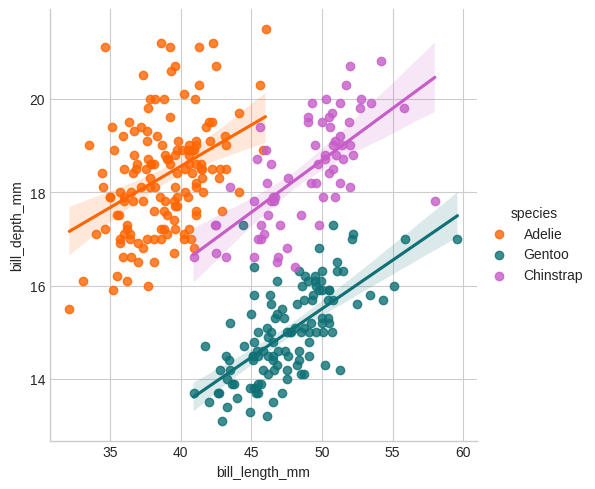

In [134]:
sns.lmplot(
    data=penguins,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue = 'species',
    palette = penguin_color,
)

for s, sp in penguins.groupby('species'):
    print(s)
    lin_reg = scipy.stats.linregress(
        x = sp.bill_length_mm, 
        y = sp.bill_depth_mm
    )
    print( lin_reg )
    print()

Adelie
LinregressResult(slope=0.8424775021643981, intercept=23.366818595563203, rvalue=0.385813200495579, pvalue=1.5149014096476615e-06, stderr=0.1678813949724412, intercept_stderr=3.086911870517409)

Chinstrap
LinregressResult(slope=1.922083892366054, intercept=13.427907594445308, rvalue=0.6535362081800428, pvalue=1.5255389633545055e-09, stderr=0.2740100545436943, intercept_stderr=5.056864541498557)

Gentoo
LinregressResult(slope=2.0603207554909613, intercept=16.670181342443946, rvalue=0.654023314272654, pvalue=7.336623629938379e-16, stderr=0.22031441167863897, intercept_stderr=3.311049237566087)



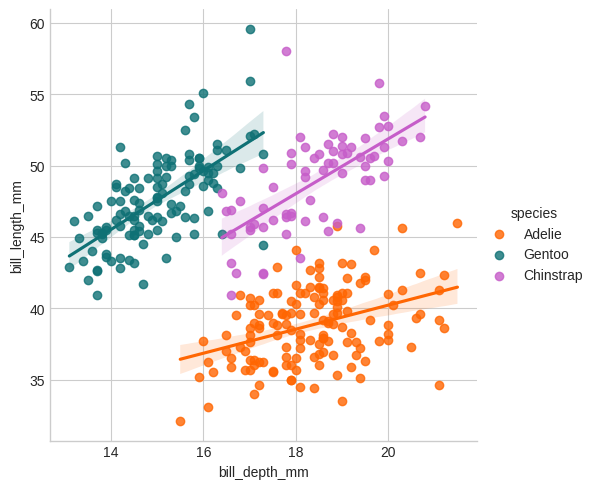

In [138]:
g = sns.lmplot(
    data=penguins,
    y = 'bill_length_mm',
    x = 'bill_depth_mm',
    hue = 'species',
    palette = penguin_color,
)
# g.set(ylim = (30, 60), xlim = (0, 30))

for s, sp in penguins.groupby('species'):
    print(s)
    lin_reg = scipy.stats.linregress(
        y = sp.bill_length_mm, 
        x = sp.bill_depth_mm
    )
    print( lin_reg )
    print()

### Discriminating by species and sex

In [98]:
print("Pearson's r correlation coefficient for bill_depth_mm vs bill_length_mm")
for s, sp in penguins.groupby('species_sex_tuple'):
    print( s )
    print(sp
          .loc [:, 'bill_length_mm']
          .corr(penguins.loc [:, 'bill_depth_mm']))
    print()

Pearson's r correlation coefficient for bill_depth_mm vs bill_length_mm
Adelie,female
0.1606361488326864

Adelie,male
-0.03824715618457483

Chinstrap,female
0.2563170802728449

Chinstrap,male
0.44627032516032644

Gentoo,female
0.43044403942836656

Gentoo,male
0.30676747386468406



<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

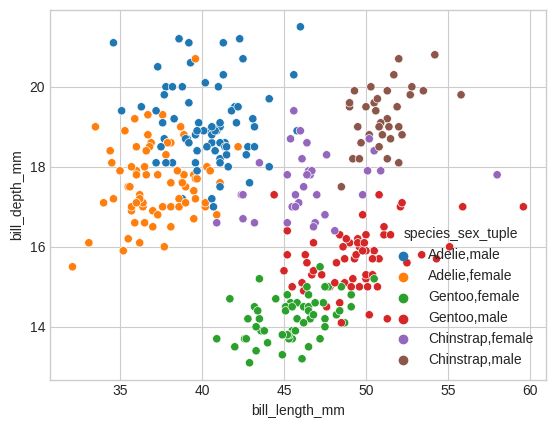

In [140]:
sns.scatterplot(
    data = penguins,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue = 'species_sex_tuple',
)


Adelie,female
LinregressResult(slope=0.07466113751304554, intercept=14.840227920438611, rvalue=0.16063614883268637, pvalue=0.1745836406339809, stderr=0.05444341034153927, intercept_stderr=2.031391426192252)

Adelie,male
LinregressResult(slope=-0.01711341356113559, intercept=19.763820546369974, rvalue=-0.03824715618457483, pvalue=0.7480124558863981, stderr=0.053062833435749, intercept_stderr=2.146586466255705)

Chinstrap,female
LinregressResult(slope=0.06440581362211445, intercept=14.588629239099468, rvalue=0.2563170802728448, pvalue=0.14340120989113542, stderr=0.042935455048951424, intercept_stderr=2.003974469680732)

Chinstrap,male
LinregressResult(slope=0.21714339809501618, intercept=8.158190847921704, rvalue=0.44627032516032644, pvalue=0.008156493937242975, stderr=0.07697456942392834, intercept_stderr=3.934736936093045)

Gentoo,female
LinregressResult(slope=0.11336865949647647, intercept=9.072424888770026, rvalue=0.4304440394283665, pvalue=0.0007444326073883297, stderr=0.03176771197

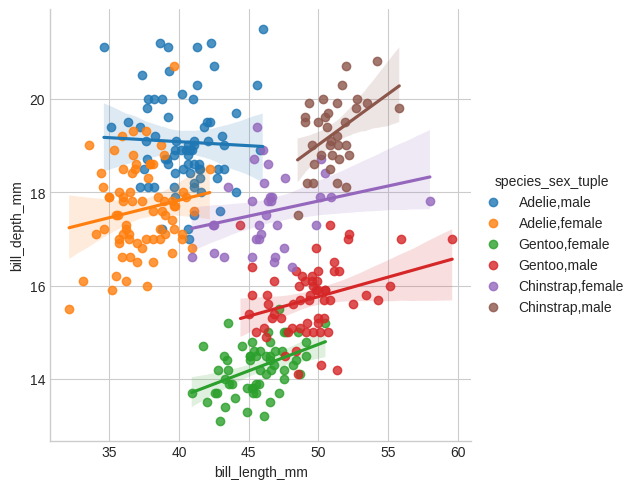

In [141]:
sns.lmplot(
    data=penguins,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue = 'species_sex_tuple',
)

for s, sp in penguins.groupby('species_sex_tuple'):
    print(s)
    lin_reg = scipy.stats.linregress(
        x = sp.bill_length_mm, 
        y = sp.bill_depth_mm
    )
    print( lin_reg )
    print()

Adelie,female
LinregressResult(slope=0.34561450804695065, intercept=31.167143792443877, rvalue=0.16063614883268637, pvalue=0.1745836406339809, stderr=0.252024454868526, intercept_stderr=4.447421514477371)

Adelie,male
LinregressResult(slope=-0.08547943699142345, intercept=42.020726303056975, rvalue=-0.03824715618457483, pvalue=0.7480124558863981, stderr=0.2650424540407428, intercept_stderr=5.062158797912905)

Chinstrap,female
LinregressResult(slope=1.0200701139351447, intercept=28.632296231375985, rvalue=0.2563170802728448, pvalue=0.14340120989113542, stderr=0.6800189619621995, intercept_stderr=11.971776513195472)

Chinstrap,male
LinregressResult(slope=0.9171690452755906, intercept=33.435915969488185, rvalue=0.44627032516032644, pvalue=0.008156493937242975, stderr=0.325124746911034, intercept_stderr=6.264355227403315)

Gentoo,female
LinregressResult(slope=1.6343323798864164, intercept=22.294281391203402, rvalue=0.4304440394283665, pvalue=0.0007444326073883297, stderr=0.4579660775749969

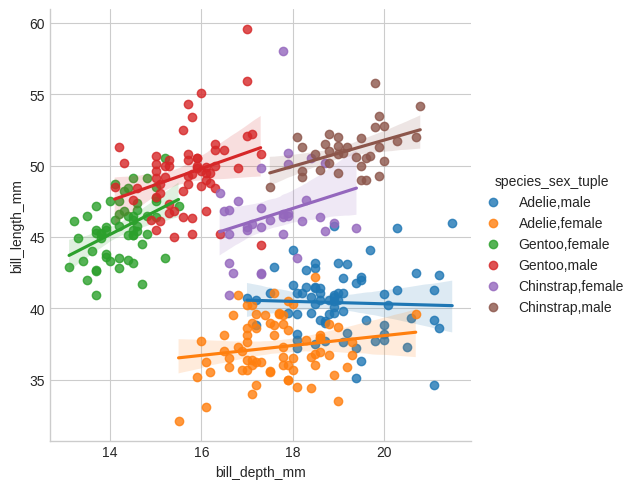

In [142]:
sns.lmplot(
    data=penguins,
    y = 'bill_length_mm',
    x = 'bill_depth_mm',
    hue = 'species_sex_tuple',
)

for s, sp in penguins.groupby('species_sex_tuple'):
    print(s)
    lin_reg = scipy.stats.linregress(
        y = sp.bill_length_mm, 
        x = sp.bill_depth_mm
    )
    print( lin_reg )
    print()
    

# Multiple Regression Analysis

In [143]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

## models

### model 1

In [153]:
model_1 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm',
        data = penguins
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.54e-32
Time:                        19:35:19   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### model 2

In [154]:
model_2 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm',
        data = penguins
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           7.04e-46
Time:                        19:35:21   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### model 3

In [155]:
model_3 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data = penguins
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          9.26e-103
Time:                        19:35:57   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### model 4

In [159]:
model_4 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data = penguins
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          6.28e-122
Time:                        19:45:18   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### model 5

In [161]:
model_5 = (
    smf.ols(
        formula = 'body_mass_g ~ flipper_length_mm + C(sex)',
        data = penguins
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          3.53e-118
Time:                        19:53:13   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### model 6

In [164]:
model_6 = (
    smf.ols(
        formula = 'body_mass_g ~ flipper_length_mm + C(sex) + C(species)',
        data = penguins
    )
    .fit()
)

model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     534.0
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          3.37e-142
Time:                        20:41:42   Log-Likelihood:                -2364.4
No. Observations:                 333   AIC:                             4739.
Df Residuals:                     328   BIC:                             4758.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -365.8174    532.050     -0.688      0.492   -1412.479     680.844
C(sex)[T.male]            530.3811     37.810     14.027      0.000     456.000     604.762
C(species)[T.Chinstrap]   -87.6345     46.347     -1.891      0.060    -178.810       3.541
C(species)[T.Gentoo]      836.2600     85.185      9.817      0.000     668.681    1003.839
flipper_length_mm          20.0249      2.846      7.037      0.000      14.427      25.623
==============================================================================
Omnibus:                        1.575   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.556
Skew:                           0.094   Prob(JB):                        0.459
Kurtosis:                       2.723   Cond. No.                     6.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Models' performance visualization

### Results table

In [220]:
models_results = pd.DataFrame(
    dict(
        actual_value = penguins.body_mass_g,
        prediction_m1 = model_1.predict(),
        prediction_m2 = model_2.predict(),
        prediction_m3 = model_3.predict(),
        prediction_m4 = model_4.predict(),
        prediction_m5 = model_5.predict(),
        prediction_m6 = model_6.predict(),
        species = penguins.species,
        sex = penguins.sex
    )
)

models_results.describe()

,actual_value,prediction_m1,prediction_m2,prediction_m3,prediction_m4,prediction_m5,prediction_m6
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,4207.057057,4207.057057,4207.057057,4207.057057,4207.057057,4207.057057,4207.057057
std,805.215802,474.635348,550.537135,703.786562,730.489964,722.829723,749.710984
min,2700.000000,3174.860643,2931.767137,2742.166968,2700.079208,2670.633919,3078.468004
25%,3550.000000,3817.119665,3717.780253,3656.543911,3585.742689,3582.270275,3471.431497
50%,4050.000000,4251.078463,4302.622894,4048.210061,4106.623314,4146.056378,4069.422154
75%,4775.000000,4606.924678,4706.954140,4786.643859,4698.539427,4690.867454,4755.774460
max,6300.000000,5561.634034,5398.662230,5739.410148,5743.297017,5790.432512,5626.579117


In [170]:
models_results.columns[:-2]

Index(['actual_value', 'prediction_m1', 'prediction_m2', 'prediction_m3',
       'prediction_m4', 'prediction_m5', 'prediction_m6'],
      dtype='object')

prediction_m1
prediction_m2
prediction_m3
prediction_m4
prediction_m5
prediction_m6


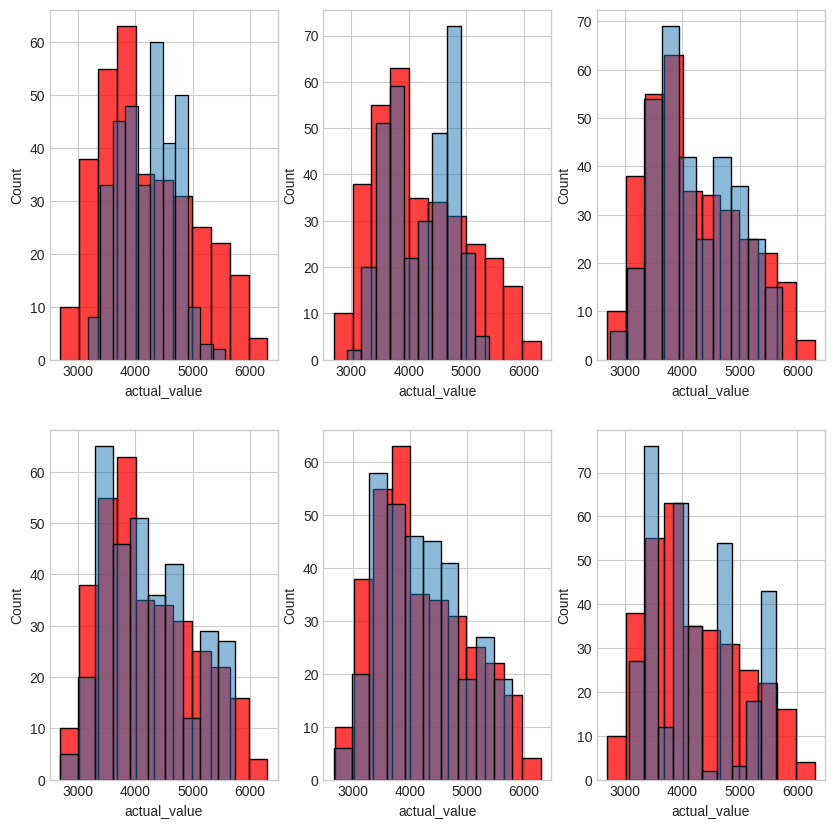

In [216]:
fig, ax = plt.subplots(2, 3, figsize = (10, 10))

for i, col in enumerate(models_results.columns[1:-2]):

    print (col)
    
    sns.histplot(
        data = models_results,
        x = 'actual_value',
        ax = ax[i // 3, i % 3],
        color = 'red',
    )
    
    sns.histplot(
        data = models_results,
        x = col,
        ax = ax[i // 3, i % 3],
        alpha = 0.5,
        # title
    )


prediction_m1
prediction_m2
prediction_m3
prediction_m4
prediction_m5
prediction_m6


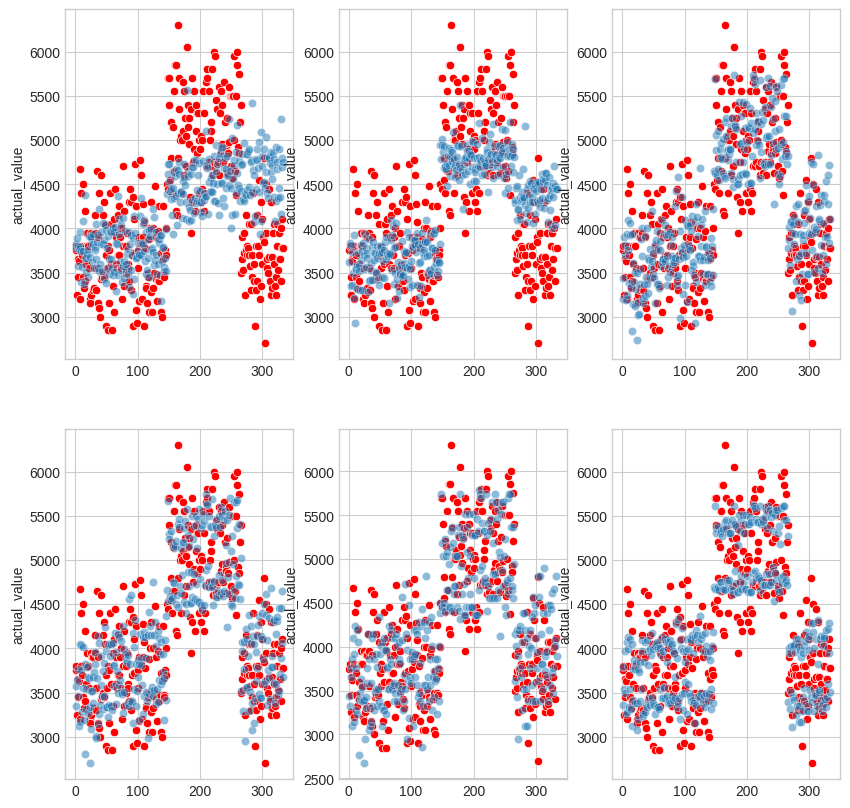

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (10, 10))

x_vals = np.linspace(1, 333, 333)

for i, col in enumerate(models_results.columns[1:-2]):

    print (col)
    
    sns.scatterplot(
        data = models_results,
        y = 'actual_value',
        x = x_vals,
        ax = ax[i // 3, i % 3],
        color = 'red',
    )
    
    sns.scatterplot(
        data = models_results,
        y = col,
        x = x_vals,
        ax = ax[i // 3, i % 3],
        alpha = 0.5,
        # title
    )


<AxesSubplot: xlabel='prediction_m6', ylabel='Count'>

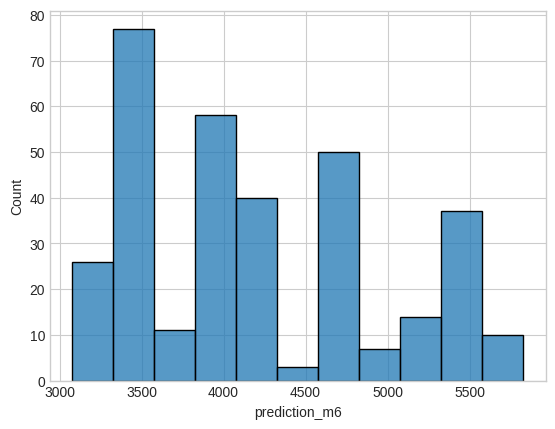

In [197]:
sns.histplot(
    data = models_results,
    x = 'prediction_m6',
    binwidth = 250,
)

In [209]:
sns.scatterplot(
    data = models_results,
    x = x_vals,
    y = 'prediction_m6',
    binwidth = 250,
)

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 333 and the vector passed to `x` has length 50.

<AxesSubplot: xlabel='actual_value', ylabel='Count'>

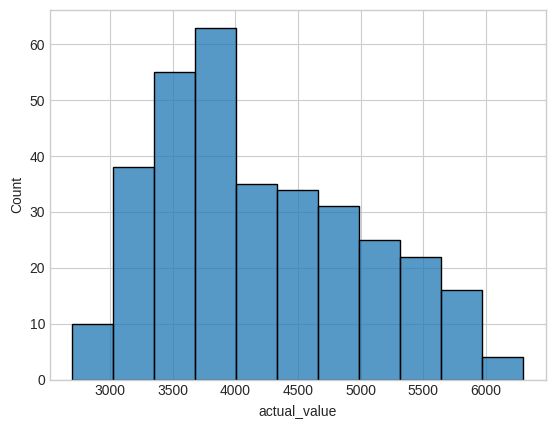

In [191]:
sns.histplot(
    data = models_results,
    x = 'actual_value',
    # binwidth = 100,
)